In [1]:
!pip install kagglehub

In [2]:
# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.
# import kagglehub
# ealaxi_paysim1_path = kagglehub.dataset_download('ealaxi/paysim1')

# print('Data source import complete.')


In [ ]:
import kagglehub
import pandas as pd
import os
import glob

print("Downloading PaySim dataset...")
path = kagglehub.dataset_download("ealaxi/paysim1")
print("Dataset downloaded to:", path)

csv_files = glob.glob(os.path.join(path, "*.csv"))

if csv_files:
    print(f"Loading file: {csv_files[0]}")
    df = pd.read_csv(csv_files[0])
    
    print("Success! Dataset Shape:", df.shape)
    display(df.head())
else:
    print("Error: No CSV file found in the downloaded directory.")

Dataset downloaded to: /Users/abhishekmarutikarennavar/.cache/kagglehub/datasets/ealaxi/paysim1/versions/2
Loading file: /Users/abhishekmarutikarennavar/.cache/kagglehub/datasets/ealaxi/paysim1/versions/2/PS_20174392719_1491204439457_log.csv
Success! Dataset Shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


reading the csv file of dataset ,showing first 5 rows and information about data types of columns

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Calculation of the fraud and non fraud count in dataset and it's graph

In [5]:
!pip install seaborn

isFraud
0    6354407
1       8213
Name: count, dtype: int64


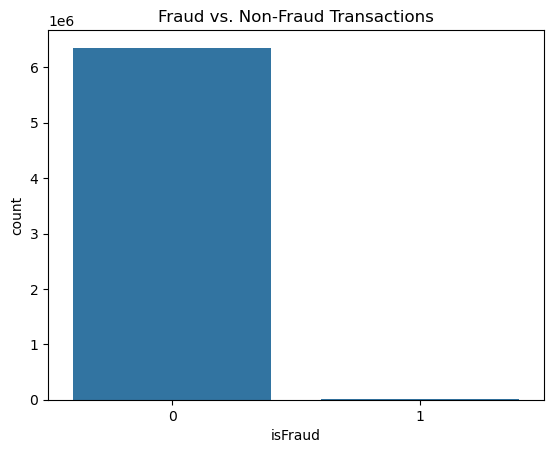

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


print(df['isFraud'].value_counts())


sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs. Non-Fraud Transactions')
plt.show()

Distribution of fraud payments over the type of transaction

isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097


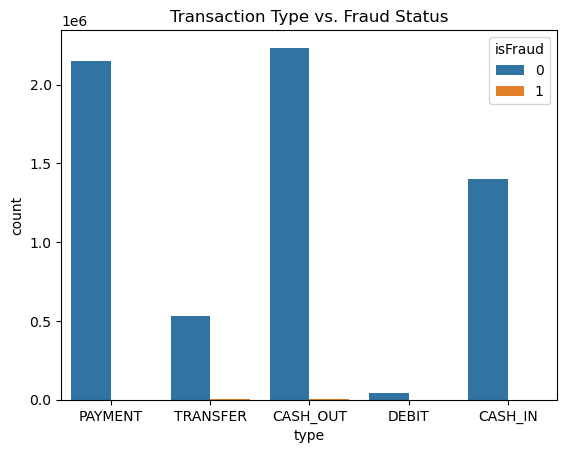

In [7]:

fraud_by_type = pd.crosstab(df['type'], df['isFraud'])
print(fraud_by_type)


sns.countplot(x='type', data=df, hue='isFraud')
plt.title('Transaction Type vs. Fraud Status')
plt.show()

Calculating the some statistical properties of dataset

In [8]:
print("Statistiacal summary")
df.describe()

Statistiacal summary


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


The Outliers of amount column shown below

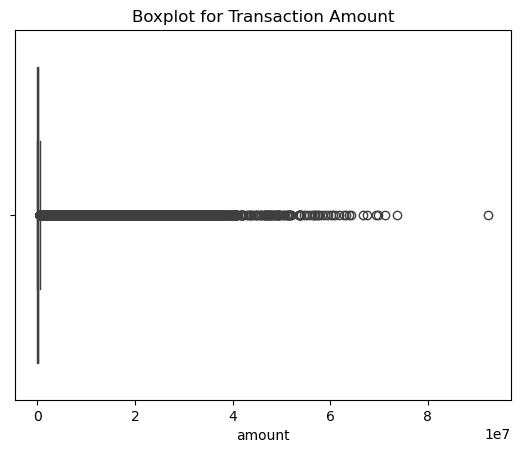

In [9]:

sns.boxplot(x=df['amount'])
plt.title('Boxplot for Transaction Amount')
plt.show()


Calculating number of missing valus in each column

In [10]:
print("Missing values count")
df.isnull().sum()

Missing values count


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The dataset has no missing values,So no need to handle mising values.If missing values existed I would have changed the missing values using simpleImputer and fit_transfer methods like this:Numerical data=median of column,,,
                             String data=mode(frequently repeated string in column),,,,
                             Boolean data=based on requirement for model design may be true or false(here true)

here we are adding a new column for capped amount which capped in between the upperbound and lowerbound of column ,which are calculated based on the middle 50% values of amount column,in this column the amount column is copied but tthe values greater than upperbound is replaced with upperbound and lesser than lowerbound with lowerbound

In [11]:
import numpy as np
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['capped_amount'] = np.where(df['amount'] > upper_bound, upper_bound,
                       np.where(df['amount'] < lower_bound, lower_bound, df['amount']))


df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,capped_amount
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64000
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28000
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00000
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00000
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14000
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13000
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,501719.33875
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,501719.33875
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,501719.33875


In [12]:


df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,capped_amount
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64000
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28000
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00000
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00000
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14000
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13000
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,501719.33875
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,501719.33875
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,501719.33875


Since ML models cannot understand text,it may confuse the model.

So to reduce the that we are using the One-Hot encoding for type column which can have 5 values(CASH_IN,CASH_OUT,PAYMENT,TRANSFER,DEBIT) is replaced by 4 seperate true or false columns for each transaction tyoe except CASH_IN,when all are false then it will be CASH_IN

This helps the model to recognise the transaction type easily without any confusion.

In [13]:
if 'type' in df.columns:
    df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)
else:
    df_encoded = df.copy()

df_encoded

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,capped_amount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64000,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28000,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00000,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00000,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14000,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13000,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,501719.33875,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,501719.33875,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,501719.33875,False,False,False,True


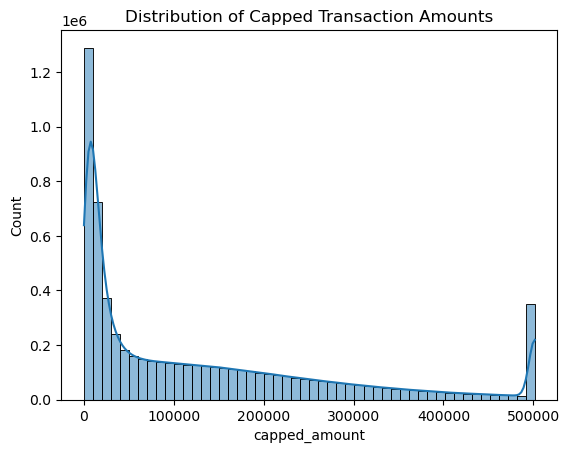

In [14]:
import matplotlib.pyplot as plt
df_encoded = df_encoded.replace([np.inf, -np.inf], np.nan)
sns.histplot(df_encoded['capped_amount'], bins=50, kde=True)
plt.title('Distribution of Capped Transaction Amounts')
plt.show()

Plotting the Correlation Heatmap

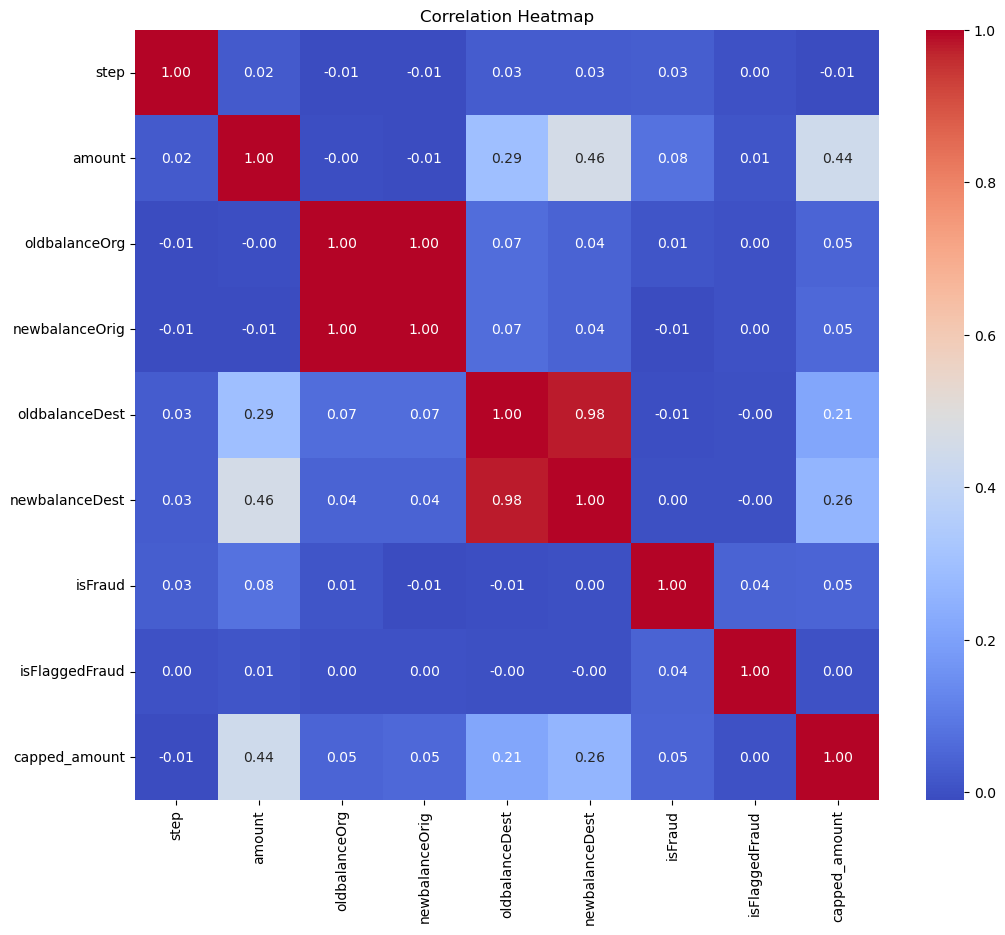

In [15]:
import numpy as np
numeric_df = df_encoded.select_dtypes(include=np.number)

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Seperating columns

In [16]:
target = 'isFraud'
y = df_encoded[target]

columns_to_drop = ['isFraud', 'amount', 'nameOrig', 'nameDest']
cols_that_exist = [col for col in columns_to_drop if col in df_encoded.columns]

X = df_encoded.drop(columns=cols_that_exist)

print("X (Features) Head")
X

X (Features) Head


,step,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,capped_amount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,170136.00,160296.36,0.00,0.00,0,9839.64000,False,False,True,False
1,1,21249.00,19384.72,0.00,0.00,0,1864.28000,False,False,True,False
2,1,181.00,0.00,0.00,0.00,0,181.00000,False,False,False,True
3,1,181.00,0.00,21182.00,0.00,0,181.00000,True,False,False,False
4,1,41554.00,29885.86,0.00,0.00,0,11668.14000,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,0.00,0.00,339682.13,0,339682.13000,True,False,False,False
6362616,743,6311409.28,0.00,0.00,0.00,0,501719.33875,False,False,False,True
6362617,743,6311409.28,0.00,68488.84,6379898.11,0,501719.33875,True,False,False,False
6362618,743,850002.52,0.00,0.00,0.00,0,501719.33875,False,False,False,True


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)
print("Training Set Shape")
print(y_train.value_counts())
print("\nTest Set Shape")
print(y_test.value_counts())

Training Set Shape
isFraud
0    5083526
1       6570
Name: count, dtype: int64

Test Set Shape
isFraud
0    1270881
1       1643
Name: count, dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['capped_amount']

scaler = StandardScaler()

X_train.loc[:, cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test.loc[:, cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("\nX_train (scaled) Head")
print(X_train.head())


X_train (scaled) Head
         step  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
292779     15       44248.00        34333.26            0.00            0.00   
499763     20           0.00            0.00            0.00            0.00   
2970411   231           0.00            0.00       489745.16       850956.95   
3137549   236           0.00            0.00            0.00            0.00   
1500682   143    13045685.58     13263705.09      2438123.98      2220104.47   

         isFlaggedFraud  capped_amount  type_CASH_OUT  type_DEBIT  \
292779                0      -0.836553          False       False   
499763                0      -0.857480          False       False   
2970411               0       1.565725           True       False   
3137549               0      -0.855914          False       False   
1500682               0       0.586532          False       False   

         type_PAYMENT  type_TRANSFER  
292779           True          False  
499

In [19]:
!pip install imbalanced-learn -q

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\nAfter SMOTE")
print("Shape of y_train (imbalanced):", y_train.value_counts())
print("\nShape of y_train_resampled (balanced):", y_train_resampled.value_counts())


After SMOTE
Shape of y_train (imbalanced): isFraud
0    5083526
1       6570
Name: count, dtype: int64

Shape of y_train_resampled (balanced): isFraud
0    5083526
1    5083526
Name: count, dtype: int64
